In [12]:
import pandas as pd

reducedPapers = pd.read_csv(
    "../processedData/processedData.csv",
    sep=',',
    index_col=0
)

reducedPapers.dropna(subset = ['processedText'], inplace = True, how='any')
reducedPapers.reset_index(drop=True, inplace=True)
reducedPapers['timePeriod'] = pd.to_datetime(reducedPapers['timePeriod'])
reducedPapers.tail()

,index,timePeriod,processedText
76092,1475,2000-01-01,noble hear hear
76093,4883,2000-01-01,thus social service department mount support c...
76094,10000,2000-01-01,miss ann widdecombe maidstone weald want press
76095,2645,2000-01-01,secondly fate cottage hospital faversham cotta...
76096,5391,2000-01-01,clear account hri east mailing give reasonable...


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

royalWords = (
"""
    king
    queen
    royalty
    majesty
    crown
    prince
    princess
    regent
    monarch
    highness
""")
royalWords = royalWords.split()

def isRoyalTopic(text):
    if len(text.split()) < 4: return 0
    for word in text.split():
        if word in royalWords:
            return 1
    return 0

def isQueenTopic(text):
    if len(text.split()) < 4: return 0
    for word in text.split():
        if word in "queen":
            return 1
    return 0

def isKingTopic(text):
    if len(text.split()) < 4: return 0
    for word in text.split():
        if word in "king":
            return 1
    return 0

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    #sentiment = 1 if scores['pos'] > 0 else 0
    sentiment = scores['pos']
    return sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sandr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
reducedPapers['royal'] = reducedPapers['processedText'].apply(isRoyalTopic)
reducedPapers['queen'] = reducedPapers['processedText'].apply(isQueenTopic)
reducedPapers['king'] = reducedPapers['processedText'].apply(isKingTopic)
reducedPapers.drop(reducedPapers[reducedPapers.royal == 0].index, inplace=True)
reducedPapers.tail()

,index,timePeriod,processedText,royal,queen,king
75032,6768,2000-01-01,delight queen refer role european union combat...,1,1,0
75415,7396,2000-01-01,andy king rugby kenilworth,1,0,1
75492,7443,2000-01-01,hunt king heath first perhaps pay tribute noble,1,0,1
75576,4287,2000-01-01,lindsay hoyle chorley welcome foreign affair c...,1,0,0
75805,7436,2000-01-01,hunt king heath certainly recognise strength f...,1,0,1


In [15]:
reducedPapers['sentiment'] = reducedPapers['processedText'].apply(get_sentiment)
reducedPapers.tail()

,index,timePeriod,processedText,royal,queen,king,sentiment
75032,6768,2000-01-01,delight queen refer role european union combat...,1,1,0,0.171
75415,7396,2000-01-01,andy king rugby kenilworth,1,0,1,0.000
75492,7443,2000-01-01,hunt king heath first perhaps pay tribute noble,1,0,1,0.288
75576,4287,2000-01-01,lindsay hoyle chorley welcome foreign affair c...,1,0,0,0.202
75805,7436,2000-01-01,hunt king heath certainly recognise strength f...,1,0,1,0.444


In [16]:
reducedPapers.to_csv('../processedData/sentimentData.csv', sep=',', columns=[ 'index','timePeriod', 'sentiment'])

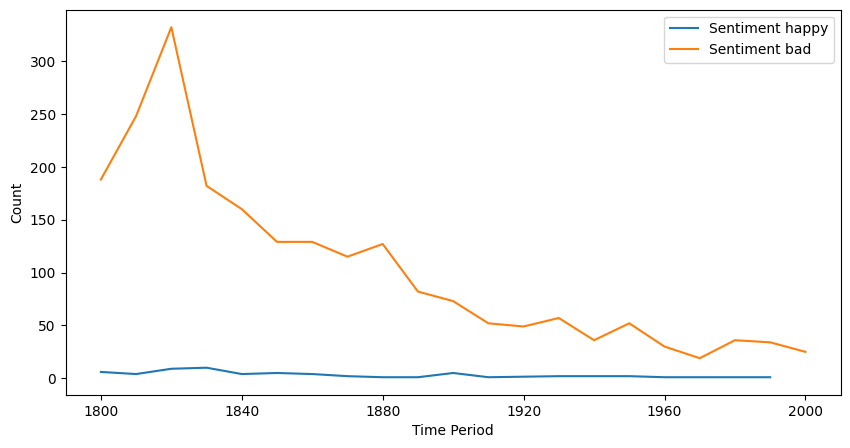

In [17]:
import matplotlib.pyplot as plt

reducedPapers.set_index('index', inplace=True)

reducedPapers_sentiment_1 = reducedPapers[reducedPapers['sentiment'] > 0.5]
reducedPapers_sentiment_0 = reducedPapers[reducedPapers['sentiment'] < 0.5]

count_by_time_1 = reducedPapers_sentiment_1.groupby('timePeriod').count()
count_by_time_0 = reducedPapers_sentiment_0.groupby('timePeriod').count()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(count_by_time_1.index, count_by_time_1['sentiment'], label='Sentiment happy')
ax.plot(count_by_time_0.index, count_by_time_0['sentiment'], label='Sentiment bad')
ax.set_xlabel('Time Period')
ax.set_ylabel('Count')
ax.legend()
plt.show()


In [18]:
import matplotlib.pyplot as plt

reducedPapers.set_index('index', inplace=True)

reducedPapers_sentiment_1 = reducedPapers[reducedPapers['sentiment'] > 0.5]
reducedPapers_sentiment_0 = reducedPapers[reducedPapers['sentiment'] < 0.5]

count_by_time_1 = reducedPapers_sentiment_1.groupby('timePeriod').count()
count_by_time_0 = reducedPapers_sentiment_0.groupby('timePeriod').count()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(count_by_time_1.index, count_by_time_1['sentiment'], label='Sentiment happy')
ax.plot(count_by_time_0.index, count_by_time_0['sentiment'], label='Sentiment bad')
ax.set_xlabel('Time Period')
ax.set_ylabel('Count')
ax.legend()
plt.show()


KeyError: "None of ['index'] are in the columns"

In [ ]:
reducedPapers.tail()

In [ ]:
import matplotlib.pyplot as plt

# convert timePeriod column to datetime format
reducedPapers['timePeriod'] = pd.to_datetime(reducedPapers['timePeriod'])

# set id as index
#reducedPapers.set_index('index', inplace=True)

# filter rows where sentiment is 1 or 0
reducedPapers_sentiment_1 = reducedPapers[reducedPapers['sentiment'] < 0.5]
reducedPapers_sentiment_0 = reducedPapers[reducedPapers['sentiment'] > 0.5]

# group by timePeriod and count the number of rows
count_by_time_1 = reducedPapers_sentiment_1.groupby('timePeriod').count()
count_by_time_0 = reducedPapers_sentiment_0.groupby('timePeriod').count()

# calculate the relative count of sentiment 1 to sentiment 0
relative_count = count_by_time_1['sentiment'] / count_by_time_0['sentiment']

# plot the time series
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(relative_count.index, relative_count, label='Sentiment 1 / Sentiment 0')
ax.set_xlabel('Time Period')
ax.set_ylabel('Relative Count')
ax.legend()
plt.show()

In [ ]:

# convert timePeriod column to datetime format
reducedPapers['timePeriod'] = pd.to_datetime(reducedPapers['timePeriod'])

# group by timePeriod and calculate the average sentiment for all values
avg_sentiment_by_time = reducedPapers.groupby('timePeriod')['sentiment'].mean()

# calculate the average sentiment for values smaller than 0 and larger than 0 separately
avg_sentiment_positive = reducedPapers[reducedPapers['sentiment'] > 0.5]['sentiment'].mean()
avg_sentiment_negative = reducedPapers[reducedPapers['sentiment'] < 0.5]['sentiment'].mean()

# calculate the relative values between the two averages
relative_values = avg_sentiment_positive / abs(avg_sentiment_negative)

# plot the time series
_, ax = plt.subplots(figsize=(10, 5))
ax.plot(avg_sentiment_by_time.index, relative_values * avg_sentiment_by_time, label='Relative Average Sentiment')
ax.set_xlabel('Time Period')
ax.set_ylabel('Relative Average Sentiment')
ax.legend()
plt.show()